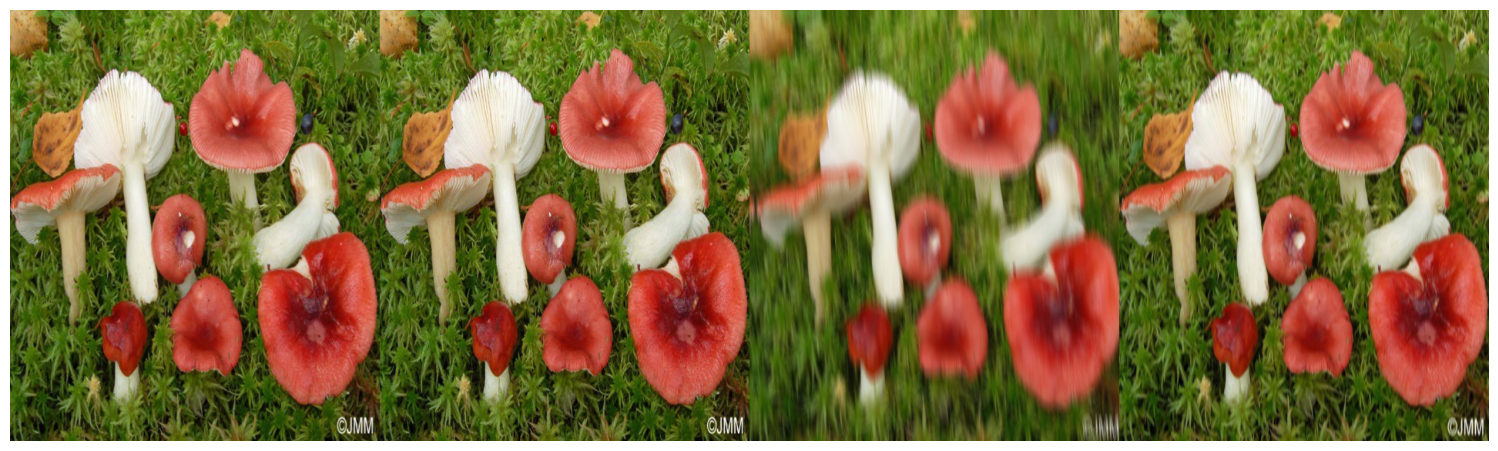

In [65]:
import cv2
import numpy as np
import albumentations as A
import matplotlib.pyplot as plt
import random

# Загрузка изображения
image = cv2.imread('input1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Количество случайных аугментаций в коллаже
num_augmentations = 4  # Максимум для коллажа 3x5

# Создаем список аугментаций с рандомными параметрами
augmented_images = []
titles = []

# Применяем случайные аугментации
for _ in range(num_augmentations):
    # Выбираем случайную аугментацию
    # Дополнительная случайная аугментация: изменение гаммы
    gamma_augmentation = random.choice([
        A.GaussNoise(var_limit=(random.randint(5, 30), random.randint(30, 100)), p=1),  # Шум с рандомным варьированием  # Изменение яркости, контраста и насыщенности
        A.MotionBlur(blur_limit=random.choice(range(1, 32, 2)), p=1)
    ])
    final_augmented_img = gamma_augmentation(image=image)['image']
    
    # Добавляем финальное изображение в список
    augmented_images.append(final_augmented_img)


# Размеры коллажа (разрешение 1920x1080)
collage_width = 1920
collage_height = 560
rows = 1  # количество строк
cols = 4  # количество столбцов
image_width = collage_width // cols
image_height = collage_height // rows

# Создаем пустой коллаж
collage = np.zeros((collage_height, collage_width, 3), dtype=np.uint8)

# Добавляем изображения в коллаж
for idx, img in enumerate(augmented_images[:rows * cols]):
    # Изменяем размер изображения до ячейки коллажа
    resized_img = cv2.resize(img, (image_width, image_height))
    
    # Определяем позицию ячейки в коллаже
    row = idx // cols
    col = idx % cols
    start_y = row * image_height
    start_x = col * image_width
    
    # Добавляем изображение в коллаж
    collage[start_y:start_y + image_height, start_x:start_x + image_width] = resized_img

# Отображаем коллаж
plt.figure(figsize=(19.2, 5.6))
plt.imshow(collage)
plt.axis('off')
plt.show()

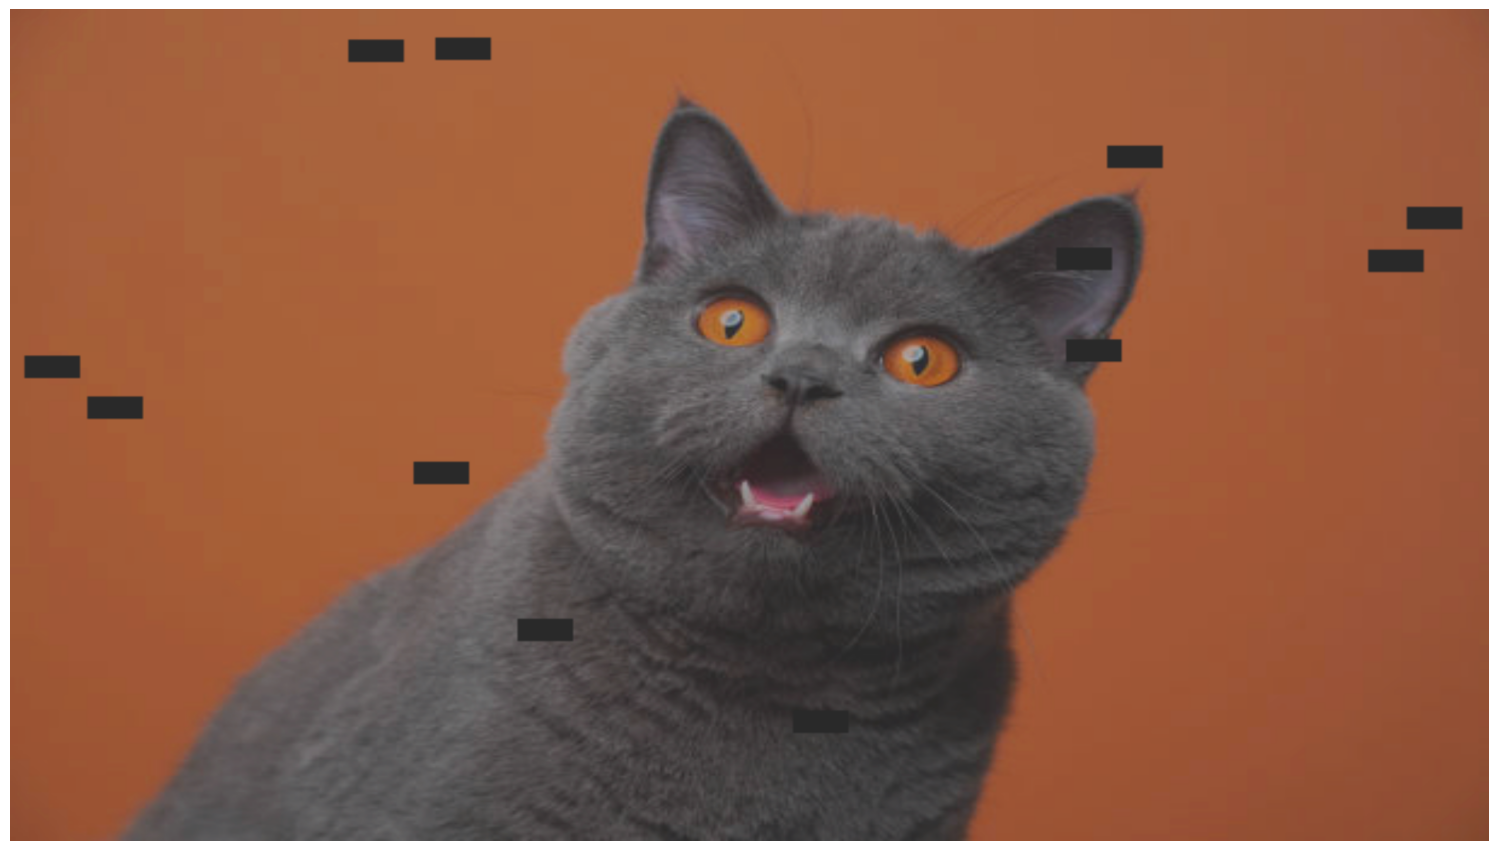

In [ ]:
import cv2
import numpy as np
import albumentations as A
import matplotlib.pyplot as plt
import random

# Загрузка изображения
image = cv2.imread('input2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Генерация случайных параметров
def random_augmentations():
    return [
        A.HorizontalFlip(p=random.uniform(0, 1)),  # Горизонтальное отражение с рандомной вероятностью
        A.VerticalFlip(p=random.uniform(0, 1)),    # Вертикальное отражение с рандомной вероятностью
        A.Rotate(limit=random.randint(10, 90), p=1),  # Вращение с случайным углом от 10 до 90
        A.ShiftScaleRotate(
            shift_limit=random.uniform(0.05, 0.2), 
            scale_limit=random.uniform(0.1, 0.3), 
            rotate_limit=random.randint(10, 45), 
            p=1
        ),
        A.ColorJitter(
            brightness=random.uniform(0.2, 0.8), 
            contrast=random.uniform(0.2, 0.8), 
            saturation=random.uniform(0.2, 0.8), 
            hue=random.uniform(0.1, 0.3), 
            p=1
        ),
        A.GaussNoise(var_limit=(random.randint(5, 30), random.randint(30, 100)), p=1),  # Шум с рандомным варьированием
        A.CLAHE(clip_limit=random.uniform(2.0, 6.0), p=1),  # Выравнивание гистограммы с рандомным лимитом
        A.RandomGamma(gamma_limit=(random.randint(60, 150)), p=1),  # Изменение гаммы
        A.HueSaturationValue(
            hue_shift_limit=random.randint(-20, 20),
            sat_shift_limit=random.randint(-30, 30),
            val_shift_limit=random.randint(-20, 20),
            p=1
        ),
        A.CoarseDropout(
            max_holes=random.randint(5, 15), 
            max_height=random.randint(10, 40), 
            max_width=random.randint(10, 40), 
            p=1
        ),
    ]

# Количество случайных аугментаций в коллаже
num_augmentations = 15  # Максимум для коллажа 3x5

# Создаем список аугментаций с рандомными параметрами
augmented_images = []
titles = []

# Применяем случайные аугментации
for _ in range(num_augmentations):
    # Выбираем случайную аугментацию
    aug = random.choice(random_augmentations())
    
    # Применяем выбранную аугментацию к изображению
    augmented_img = aug(image=image)['image']
    
    # Дополнительная случайная аугментация: изменение гаммы
    gamma_augmentation = random.choice([
        A.ColorJitter(
            brightness=random.uniform(0.2, 0.8), 
            contrast=random.uniform(0.2, 0.8), 
            saturation=random.uniform(0.2, 0.8), 
            hue=random.uniform(0.1, 0.3), 
            p=1
        )  # Изменение яркости, контраста и насыщенности
    ])
    final_augmented_img = gamma_augmentation(image=augmented_img)['image']
    
    # Добавляем финальное изображение в список
    augmented_images.append(final_augmented_img)
    titles.append(f"{aug.__class__.__name__} + RandomGamma")


# Размеры коллажа (разрешение 1920x1080)
collage_width = 1920
collage_height = 1080
rows = 3  # количество строк
cols = 5  # количество столбцов
image_width = collage_width // cols
image_height = collage_height // rows

# Создаем пустой коллаж
collage = np.zeros((collage_height, collage_width, 3), dtype=np.uint8)

# Добавляем изображения в коллаж
for idx, img in enumerate(augmented_images[:rows * cols]):
    # Изменяем размер изображения до ячейки коллажа
    resized_img = cv2.resize(img, (image_width, image_height))
    
    # Определяем позицию ячейки в коллаже
    row = idx // cols
    col = idx % cols
    start_y = row * image_height
    start_x = col * image_width
    
    # Добавляем изображение в коллаж
    collage[start_y:start_y + image_height, start_x:start_x + image_width] = resized_img

# Отображаем коллаж
plt.figure(figsize=(19.2, 10.8))
plt.imshow(collage)
plt.axis('off')
plt.show()
